Business challenge/requirement

Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries.  It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company. Lithionpower has a variable pricing model based on the driver's driving history. As the life of a battery depends on factors such as overspeeding, distance driving per day,etc.You as anML expert haveto create a cluster model where drivers can be grouped based on the driving data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('driver-data.csv')
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


Text(0, 0.5, 'total_time_speed>5 per day')

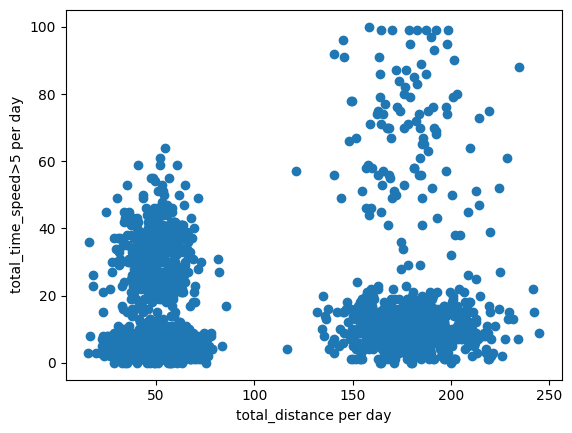

In [8]:
plt.scatter(data.mean_dist_day,data.mean_over_speed_perc)
plt.xlabel('total_distance per day')
plt.ylabel('total_time_speed>5 per day')

In [9]:
kmeans=KMeans(n_clusters=2)

In [12]:
kmeans.fit_predict(data[['mean_dist_day','mean_over_speed_perc']])

C:\Users\Komal\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 0, 0])

In [13]:
y_pred=kmeans.fit_predict(data[['mean_dist_day','mean_over_speed_perc']])

C:\Users\Komal\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
data['speed_predicted']=y_pred

In [15]:
data.head(6)

,id,mean_dist_day,mean_over_speed_perc,speed_predicted
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
5,3423313857,41.91,10,0


In [16]:
data['speed_predicted'].unique()

array([0, 1])

In [17]:
df1=data[data['speed_predicted']==1]
df0=data[data['speed_predicted']==0]

In [18]:
kmeans.n_clusters

2

In [19]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

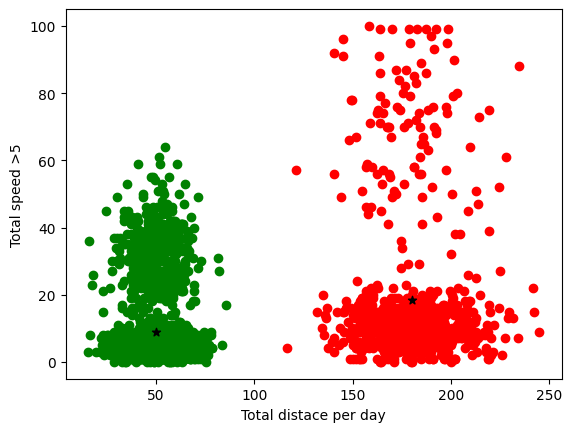

In [22]:
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='red')
plt.scatter(df0['mean_dist_day'],df0['mean_over_speed_perc'],color='green')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*')
plt.xlabel('Total distace per day')
plt.ylabel('Total speed >5')
plt.show()

In [23]:
#use preprocessing now

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [26]:
df['mean_dist_day']=scaler.fit_transform(data[['mean_dist_day']])

In [27]:
data['mean_over_speed_perc']=scaler.fit_transform(data[['mean_over_speed_perc']])

Text(0, 0.5, 'mean_over_speed_perc')

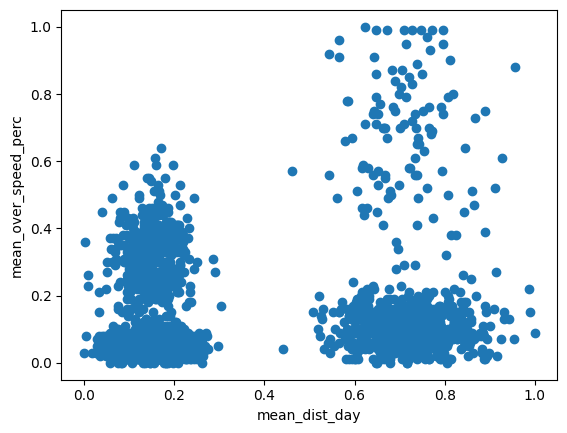

In [31]:
plt.scatter(data['mean_dist_day'],data['mean_over_speed_perc'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

In [34]:
y_predicted = kmeans.fit_predict(data[['mean_dist_day','mean_over_speed_perc']])
# assign the point to a cluster/group
data['cluster'] = y_predicted
df1 = data[data['cluster']==0]
df2 = data[data['cluster']==1]

C:\Users\Komal\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


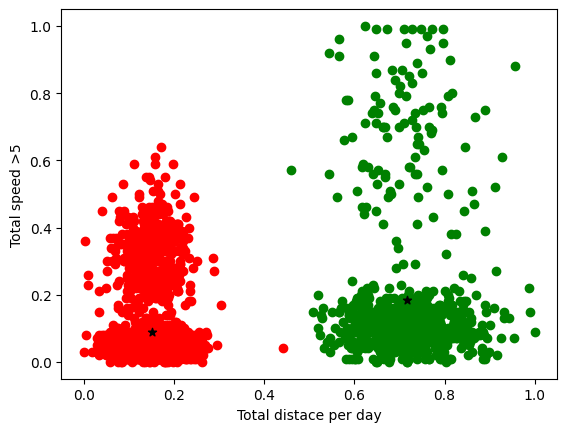

In [36]:
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='red')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='green')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*')
plt.xlabel('Total distace per day')
plt.ylabel('Total speed >5')
plt.show()

In [74]:
inertia = []
for k in range(2,10):
    km = KMeans(n_clusters=k,n_init=10)
    km.fit(data[['mean_dist_day','mean_over_speed_perc']])
    inertia.append(km.inertia_)

In [39]:
inertia

[81.24817490831504,
 48.911420910137224,
 21.627961552686813,
 18.134718682000866,
 15.07472691385121,
 12.863456823988017,
 10.711402547031426,
 9.724328773479037]

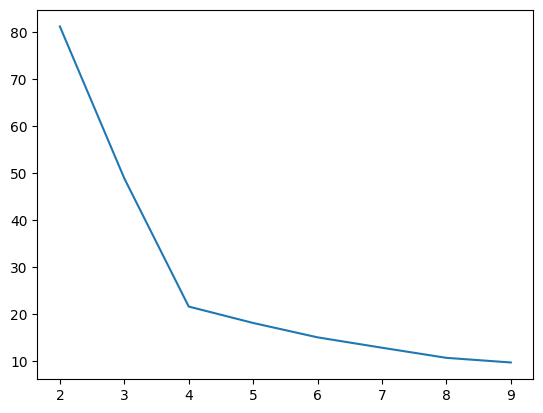

In [40]:
plt.plot(range(2,10), inertia)

In [45]:
kmeans_2=KMeans(n_clusters=4,n_init=10)# for removing above warning we are defining n_init explicitly

In [47]:
y_pred2=kmeans_2.fit_predict(data[['mean_dist_day','mean_over_speed_perc']])

In [48]:
data['cluster_4']=y_pred2

In [51]:
data['cluster_4'].unique()

array([0, 2, 3, 1])

In [52]:
df1 = data[data['cluster_4']==0]
df2 = data[data['cluster_4']==1]
df3 = data[data['cluster_4']==2]
df4 = data[data['cluster_4']==3]

In [87]:
kmeans_2.cluster_centers_

array([[0.15215608, 0.3236534 ],
       [0.71890399, 0.10520115],
       [0.15035823, 0.05204472],
       [0.70796483, 0.70288462]])

In [84]:
cluster_centers = np.array([[0.15215608, 0.3236534 ],
                            [0.71890399, 0.10520115],
                            [0.15035823, 0.05204472],
                            [0.70796483, 0.70288462]])

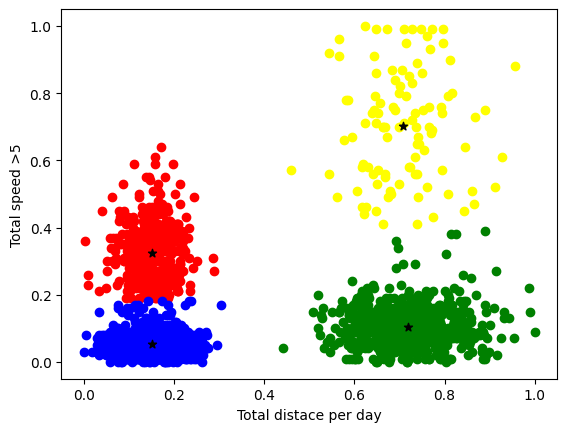

In [86]:
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='red')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='green')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='blue')
plt.scatter(df4['mean_dist_day'],df4['mean_over_speed_perc'],color='yellow')
plt.scatter(cluster_centers[:, 0],cluster_centers[:, 1],color='black',marker='*',label='Cluster Centers')
plt.xlabel('Total distace per day')
plt.ylabel('Total speed >5')
plt.show()